# Team Mavericks || Adil Rehman, Minh Huy Pham, Hassan Ikram, Steve, Charles

Dataset of vehicles sold in May 2023

Some adverts were sold, others disappear for other reasons, such as being sent to a dealer-to-dealer auction

Predict 'days_to_sell' 

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import missingno as ms

In [2]:
df = pd.read_parquet("Data/rate_of_sale_may_2023.snappy.parquet" ) 

dict_df = pd.read_csv("Data/rate_of_sale_data_dict.csv" ) 

In [ ]:
# import dtale

# d = dtale.show(df)
# d.open_browser()

In [3]:
df

,stock_item_id,last_date_seen,first_date_seen,days_to_sell,first_retailer_asking_price,last_retailer_asking_price,can_home_deliver,reviews_per_100_advertised_stock_last_12_months,segment,seats,...,odometer_reading_miles,first_registration_date,attention_grabber,manufacturer_approved,price_indicator_rating,adjusted_retail_amount_gbp,predicted_mileage,number_of_images,advert_quality,postcode_area
0,52ae009b671ab58b3d4ff109a9fbdcf8d847de0fa190e1...,2023-05-05,2021-03-25,771,6995,6495.0,False,3.9,Independent,5.0,...,65000,2004-05-07,*IMMACULATE**FULL HISTORY*,False,NOANALYSIS,NaN,NaN,50,NaN,AL
1,32b1bac6934b1f64ff43cffa9df5aa296ead8143c36f9f...,2023-05-09,2021-05-25,714,13725,14995.0,False,NaN,Franchise,5.0,...,16018,2019-11-30,Sports Styling | Great Economy,True,GOOD,14848.0,26078.0,15,57.0,HP
2,21703d22d87eaa95c4dc81a60ba2c8cbe3b90ab659292c...,2023-05-12,2021-11-26,532,15499,13999.0,False,0.2,Independent,5.0,...,31093,2018-03-08,"Sat Nav,Leather,Auto,Euro 6",False,GREAT,14571.0,34732.0,22,61.0,SR
3,661acafc271373946cea7d30ac7f34257404ab89a1ad33...,2023-05-16,2022-02-17,453,10995,9995.0,False,7.9,Franchise,5.0,...,79000,2015-07-02,Viewing by APPOINTMENT ONLY,False,FAIR,9349.0,65684.0,30,61.0,FY
4,638216dc92410d965b416fea5b3cec9ca903368795fdde...,2023-05-04,2022-03-21,409,46000,37500.0,False,6.8,Franchise,5.0,...,10214,2022-03-03,Reserve Online,True,GOOD,37055.0,11765.0,22,48.0,LE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224550,f93da2e68ed75b921e3edbb5800155851725db45dac4e2...,2023-05-26,2023-05-24,2,11045,11045.0,True,17.3,Independent,5.0,...,59000,2016-03-13,2 OWNERS LOW MILEAGE SATNAV,False,GOOD,11230.0,52196.0,9,63.0,BS
224551,558367b9f89d83eee684559ab31f06d46332d119a008fd...,2023-05-28,2023-05-24,4,9000,9000.0,False,8.3,Franchise,5.0,...,37717,2014-11-25,Competitive finance available.,False,GOOD,8898.0,49703.0,19,31.0,PA
224552,deb732e58db907f571ab161110a80506a4bb2ba53248a9...,2023-05-27,2023-05-25,2,11300,11300.0,False,1.7,Franchise,5.0,...,51488,2019-11-30,GREAT MPG,False,GREAT,11646.0,28134.0,4,30.0,DT
224553,1ca206c9b6b1eb56363c1d6e3bbc9d283dc4a4df622a32...,2023-05-27,2023-05-25,2,4699,4699.0,False,8.7,Independent,4.0,...,38408,2011-09-13,None,False,GOOD,4743.0,53249.0,30,63.0,PR


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

dict_df

C:\Users\adiln\AppData\Local\Temp\ipykernel_9104\1875720891.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Field,Description
0,stock_item_id,Unique ID of the advert e.g. 8a42801e86dad35a0186dd181f956cb5
1,last_date_seen,The date the vehicle was last seen advertised on Auto Trader e.g. 2023-01-31
2,first_date_seen,The first date the vehicle was listed on Auto Trader
3,days_to_sell,The difference in days between first_date_seen and last_date_seen
4,first_retailer_asking_price,The price the advert had when first created. This may have been a temp holding price before it went live.
5,last_retailer_asking_price,The last seen price
6,can_home_deliver,This advert is able to be delivered to the buyers home
7,reviews_per_100_advertised_stock_last_12_months,"How many reviews the seller has recieved in the last 12 months per 100 stock advertised, i.e. 200 stock advertised over the whole year, 150 reviews 150/2= 75"
8,segment,Whether the seller is a Franchise or Independent retailer
9,seats,Number of seats in the vehicle


In [5]:
df.duplicated(subset=['stock_item_id'], keep=False).sum()

0

No duplicates found

In [6]:
temp_df = df.drop("stock_item_id", axis=1)
dropped_df = temp_df.drop("derivative_id", axis=1)

dropped_df

,last_date_seen,first_date_seen,days_to_sell,first_retailer_asking_price,last_retailer_asking_price,can_home_deliver,reviews_per_100_advertised_stock_last_12_months,segment,seats,doors,co2_emission_gpkm,top_speed_mph,zero_to_sixty_mph_seconds,engine_power_bhp,fuel_economy_wltp_combined_mpg,battery_range_miles,battery_usable_capacity_kwh,length_mm,boot_space_seats_up_litres,insurance_group,plate,make,model,generation,derivative,body_type,fuel_type,transmission_type,drivetrain,colour,odometer_reading_miles,first_registration_date,attention_grabber,manufacturer_approved,price_indicator_rating,adjusted_retail_amount_gbp,predicted_mileage,number_of_images,advert_quality,postcode_area
0,2023-05-05,2021-03-25,771,6995,6495.0,False,3.9,Independent,5.0,3.0,194.0,137.0,7.2,172.0,22.1,NaN,None,3803.0,NaN,31,04,Renault,Clio,Hatchback (2001 - 2005),2.0 16v Renaultsport 3dr,Hatchback,Petrol,Manual,Front Wheel Drive,None,65000,2004-05-07,*IMMACULATE**FULL HISTORY*,False,NOANALYSIS,NaN,NaN,50,NaN,AL
1,2023-05-09,2021-05-25,714,13725,14995.0,False,NaN,Franchise,5.0,5.0,108.0,113.0,None,99.0,50.4,NaN,None,4065.0,311.0,10,69,Ford,Fiesta,Hatchback (2017 - 2021),1.0T EcoBoost ST-Line Euro 6 (s/s) 5dr,Hatchback,Petrol,Manual,Front Wheel Drive,Silver,16018,2019-11-30,Sports Styling | Great Economy,True,GOOD,14848.0,26078.0,15,57.0,HP
2,2023-05-12,2021-11-26,532,15499,13999.0,False,0.2,Independent,5.0,5.0,144.0,112.0,12.4,110.0,44.8,NaN,None,4314.0,448.0,10,18,MG,MG ZS,SUV (2017 - 2021),1.0 T-GDI Exclusive Auto Euro 6 5dr,SUV,Petrol,Automatic,Front Wheel Drive,Blue,31093,2018-03-08,"Sat Nav,Leather,Auto,Euro 6",False,GREAT,14571.0,34732.0,22,61.0,SR
3,2023-05-16,2022-02-17,453,10995,9995.0,False,7.9,Franchise,5.0,5.0,122.0,121.0,None,148.0,60.1,NaN,None,4524.0,406.0,23,15,Ford,Kuga,SUV (2012 - 2016),2.0 TDCi Titanium 2WD Euro 6 (s/s) 5dr,SUV,Diesel,Manual,Front Wheel Drive,White,79000,2015-07-02,Viewing by APPOINTMENT ONLY,False,FAIR,9349.0,65684.0,30,61.0,FY
4,2023-05-04,2022-03-21,409,46000,37500.0,False,6.8,Franchise,5.0,4.0,149.0,152.0,None,201.0,49.6,NaN,None,4939.0,530.0,33,22,Audi,A6 Saloon,Saloon (2018 - ),2.0 TDI 40 Black Edition S Tronic Euro 6 (s/s) 4dr,Saloon,Diesel,Automatic,Front Wheel Drive,Grey,10214,2022-03-03,Reserve Online,True,GOOD,37055.0,11765.0,22,48.0,LE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224550,2023-05-26,2023-05-24,2,11045,11045.0,True,17.3,Independent,5.0,5.0,123.0,130.0,None,134.0,53.3,NaN,None,4329.0,360.0,18,16,BMW,1 Series,Hatchback (2015 - 2017),1.5 118i Sport Euro 6 (s/s) 5dr,Hatchback,Petrol,Manual,Rear Wheel Drive,Black,59000,2016-03-13,2 OWNERS LOW MILEAGE SATNAV,False,GOOD,11230.0,52196.0,9,63.0,BS
224551,2023-05-28,2023-05-24,4,9000,9000.0,False,8.3,Franchise,5.0,5.0,142.0,101.0,None,86.0,45.6,NaN,None,3665.0,252.0,04,64,Hyundai,i10,Hatchback (2013 - 2017),1.2 Premium Auto Euro 5 5dr,Hatchback,Petrol,Automatic,Front Wheel Drive,Black,37717,2014-11-25,Competitive finance available.,False,GOOD,8898.0,49703.0,19,31.0,PA
224552,2023-05-27,2023-05-25,2,11300,11300.0,False,1.7,Franchise,5.0,5.0,107.0,121.0,None,118.0,57.6,NaN,None,4040.0,311.0,14,69,Ford,Fiesta,Hatchback (2017 - 2021),1.5 TDCi Titanium Euro 6 (s/s) 5dr,Hatchback,Diesel,Manual,Front Wheel Drive,Red,51488,2019-11-30,GREAT MPG,False,GREAT,11646.0,28134.0,4,30.0,DT
224553,2023-05-27,2023-05-25,2,4699,4699.0,False,8.7,Independent,4.0,2.0,150.0,118.0,10.7,120.0,43.5,NaN,None,4037.0,187.0,17,61,Peugeot,207 CC,Convertible (2009 - 2014),1.6 VTi GT Euro 5 2dr,Convertible,Petrol,Manual,Front Wheel Drive,White,38408,2011-09-13,None,False,GOOD,4743.0,53249.0,30,63.0,PR


In [7]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224555 entries, 0 to 224554
Data columns (total 40 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   last_date_seen                                   224555 non-null  object 
 1   first_date_seen                                  224555 non-null  object 
 2   days_to_sell                                     224555 non-null  int32  
 3   first_retailer_asking_price                      224555 non-null  int64  
 4   last_retailer_asking_price                       223626 non-null  float64
 5   can_home_deliver                                 224555 non-null  bool   
 6   reviews_per_100_advertised_stock_last_12_months  191289 non-null  float64
 7   segment                                          224523 non-null  object 
 8   seats                                            224426 non-null  float64
 9   doors          

In [23]:
dropped_df.describe()

,days_to_sell,first_retailer_asking_price,last_retailer_asking_price,reviews_per_100_advertised_stock_last_12_months,seats,doors,co2_emission_gpkm,top_speed_mph,zero_to_sixty_mph_seconds,engine_power_bhp,fuel_economy_wltp_combined_mpg,battery_range_miles,battery_usable_capacity_kwh,length_mm,boot_space_seats_up_litres,insurance_group,odometer_reading_miles,adjusted_retail_amount_gbp,predicted_mileage,number_of_images,advert_quality
count,224555.000000,2.245550e+05,2.236260e+05,191289.000000,224426.0,224551.0,224438.000000,223902.000000,81403.000000,224553.000000,217687.000000,11061.000000,11060.000000,224159.0,217354.000000,223847.0,2.245550e+05,216389.000000,216704.000000,224555.000000,180623.000000
mean,44.423771,1.871680e+04,1.802800e+04,9.047877,4.938987,4.591042,132.613069,123.355705,9.659446,154.896236,52.812060,153.349968,37.240606,4258.131375,380.455584,20.877233,4.461378e+04,18280.148672,43354.033474,32.612433,54.570791
std,56.751408,4.190931e+04,2.067387e+04,11.558496,0.672963,0.869274,43.868906,17.677968,2.558180,82.737218,24.939234,111.317425,27.161766,685.877431,167.149296,11.515302,3.305834e+04,14390.140083,26811.880940,18.789499,15.068191
min,0.000000,1.000000e+00,1.000000e+00,0.000000,1.0,2.0,0.000000,0.000000,2.300000,0.000000,0.000000,15.000000,3.000000,0.0,0.000000,1.0,0.000000e+00,349.000000,0.000000,0.000000,1.000000
25%,12.000000,8.995000e+03,8.900000e+03,1.500000,5.0,5.0,113.000000,112.000000,8.000000,109.000000,43.300000,34.000000,11.100000,4062.0,290.000000,12.0,1.883000e+04,9465.000000,22686.000000,20.000000,46.000000
50%,28.000000,1.524900e+04,1.499100e+04,5.100000,5.0,5.0,129.000000,121.000000,9.600000,134.000000,50.400000,168.000000,36.000000,4360.0,379.000000,18.0,3.772400e+04,15467.000000,38104.500000,31.000000,56.000000
75%,56.000000,2.299000e+04,2.204875e+04,12.600000,5.0,5.0,151.000000,134.000000,11.200000,181.000000,57.650000,254.000000,58.000000,4597.0,480.000000,28.0,6.400000e+04,22692.000000,61719.250000,42.000000,65.000000
max,1829.000000,1.779950e+07,4.999995e+06,300.000000,9.0,6.0,567.000000,248.000000,24.000000,2996.000000,1412.400000,464.000000,108.400000,5998.0,4610.000000,50.0,1.632147e+06,233997.000000,161264.000000,199.000000,100.000000


In [8]:
dropped_df['price_indicator_rating'].unique()

array(['NOANALYSIS', 'GOOD', 'GREAT', 'FAIR', 'LOW', 'HIGH'], dtype=object)

In [9]:
dropped_df['first_registration_date'].isnull().sum()

40

In [10]:
int_columns = ['seats', 'doors', 'insurance_group', 'length_mm']
date_columns = ['last_date_seen', 'first_date_seen', 'first_registration_date']
float_columns = ['zero_to_sixty_mph_seconds', 'engine_power_bhp', 
                  'fuel_economy_wltp_combined_mpg', 'battery_usable_capacity_kwh']


# non_integer_rows = dropped_df[dropped_df[int_columns].astype(str).apply(lambda x: x.str.contains('\.'), axis=0).any(axis=1)]

# # dropped_df[int_columns] = dropped_df[int_columns].fillna(-1).astype(int)
# for column in int_columns:
#     print(dropped_df[column].unique())


In [11]:
dropped_df['zero_to_sixty_mph_seconds'] = dropped_df['zero_to_sixty_mph_seconds'].replace('None', pd.NA)

dropped_df['zero_to_sixty_mph_seconds'] = pd.to_numeric(dropped_df['zero_to_sixty_mph_seconds'], errors='coerce')
dropped_df['zero_to_sixty_mph_seconds'].unique()

array([ 7.2 ,   nan, 12.4 , 14.1 , 11.2 ,  4.3 ,  8.8 , 12.7 ,  7.6 ,
       10.4 ,  4.5 , 10.3 , 13.1 ,  4.6 , 11.6 , 12.  , 10.9 ,  6.9 ,
       13.4 ,  2.9 ,  7.5 , 16.6 ,  9.3 ,  9.4 ,  9.9 ,  6.7 , 10.7 ,
        6.6 ,  8.4 , 10.5 , 11.1 , 11.8 ,  6.3 ,  3.7 , 13.3 ,  8.6 ,
        5.1 ,  7.8 , 14.4 ,  6.2 ,  8.9 , 11.9 , 11.5 ,  7.  ,  9.7 ,
        8.5 , 11.7 , 10.6 , 11.4 , 13.6 ,  8.1 , 15.9 ,  7.7 , 11.  ,
        9.8 , 11.3 ,  7.9 ,  7.3 ,  8.2 , 10.  ,  9.1 ,  9.  ,  3.1 ,
       13.2 ,  8.7 ,  6.8 ,  7.4 ,  8.3 ,  4.4 ,  3.4 , 14.5 ,  5.8 ,
        9.5 , 12.9 ,  5.7 , 10.2 , 13.9 ,  5.9 , 10.8 ,  4.8 , 12.2 ,
        4.2 , 12.6 , 13.8 ,  9.6 , 12.3 ,  3.8 ,  4.7 ,  9.2 , 14.6 ,
        6.4 ,  7.1 ,  3.9 ,  5.3 ,  8.  ,  6.5 , 13.5 , 10.1 , 14.9 ,
       14.7 , 14.8 ,  4.9 , 14.  , 14.2 ,  2.5 , 15.1 , 13.7 ,  4.1 ,
        5.4 , 16.4 , 16.9 , 17.2 , 12.1 ,  3.2 ,  5.5 ,  5.6 , 12.5 ,
       15.5 , 14.3 , 13.  ,  4.  , 17.9 ,  6.1 , 12.8 , 19.  ,  5.2 ,
       16.  ,  6.  ,

In [12]:
for column in date_columns:
    dropped_df[column] = pd.to_datetime(dropped_df[column], errors='coerce')

bool_columns = ['segment']
for column in bool_columns:
    dropped_df[column] = dropped_df[column].astype(bool)

for column in int_columns:
    dropped_df[column] = pd.to_numeric(dropped_df[column], errors='coerce')
    
    dropped_df[column] = dropped_df[column].fillna(-1)
    
    dropped_df[column] = dropped_df[column].astype(int)

for column in float_columns:
    dropped_df[column] = pd.to_numeric(dropped_df[column], errors='coerce').astype(float)


In [13]:
for column in int_columns:
    print(dropped_df[column].isnull().sum())

0
0
0
0


In [14]:
for column in int_columns:
    has_minus_one = (pd.to_numeric(dropped_df[column], errors='coerce') == -1).any()

    print(f"BEFORE:\nColumn '{column}' has -1 values: {has_minus_one}")

    dropped_df[column] = pd.to_numeric(dropped_df[column], errors='coerce').replace({-1: np.nan}).astype(float).astype(pd.Int64Dtype())

    has_minus_one = (pd.to_numeric(dropped_df[column], errors='coerce') == -1).any()

    print(f"AFTER:\nColumn '{column}' has -1 values: {has_minus_one}")
    print()


BEFORE:
Column 'seats' has -1 values: True
AFTER:
Column 'seats' has -1 values: False

BEFORE:
Column 'doors' has -1 values: True
AFTER:
Column 'doors' has -1 values: False

BEFORE:
Column 'insurance_group' has -1 values: True
AFTER:
Column 'insurance_group' has -1 values: False

BEFORE:
Column 'length_mm' has -1 values: True
AFTER:
Column 'length_mm' has -1 values: False



In [15]:
for column in int_columns:
    print(dropped_df[column].isnull().sum())

129
4
708
396


In [16]:
all_cols = []
all_cols = int_columns+float_columns+date_columns+['segment']

In [17]:
dropped_df[all_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224555 entries, 0 to 224554
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   seats                           224426 non-null  Int64         
 1   doors                           224551 non-null  Int64         
 2   insurance_group                 223847 non-null  Int64         
 3   length_mm                       224159 non-null  Int64         
 4   zero_to_sixty_mph_seconds       81403 non-null   float64       
 5   engine_power_bhp                224553 non-null  float64       
 6   fuel_economy_wltp_combined_mpg  217687 non-null  float64       
 7   battery_usable_capacity_kwh     11060 non-null   float64       
 8   last_date_seen                  224555 non-null  datetime64[ns]
 9   first_date_seen                 224555 non-null  datetime64[ns]
 10  first_registration_date         224506 non-null  datetim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224555 entries, 0 to 224554
Data columns (total 40 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   last_date_seen                                   224555 non-null  datetime64[ns]
 1   first_date_seen                                  224555 non-null  datetime64[ns]
 2   days_to_sell                                     224555 non-null  int32         
 3   first_retailer_asking_price                      224555 non-null  int64         
 4   last_retailer_asking_price                       223626 non-null  float64       
 5   can_home_deliver                                 224555 non-null  bool          
 6   reviews_per_100_advertised_stock_last_12_months  191289 non-null  float64       
 7   segment                                          224555 non-null  bool          
 8   seats                   

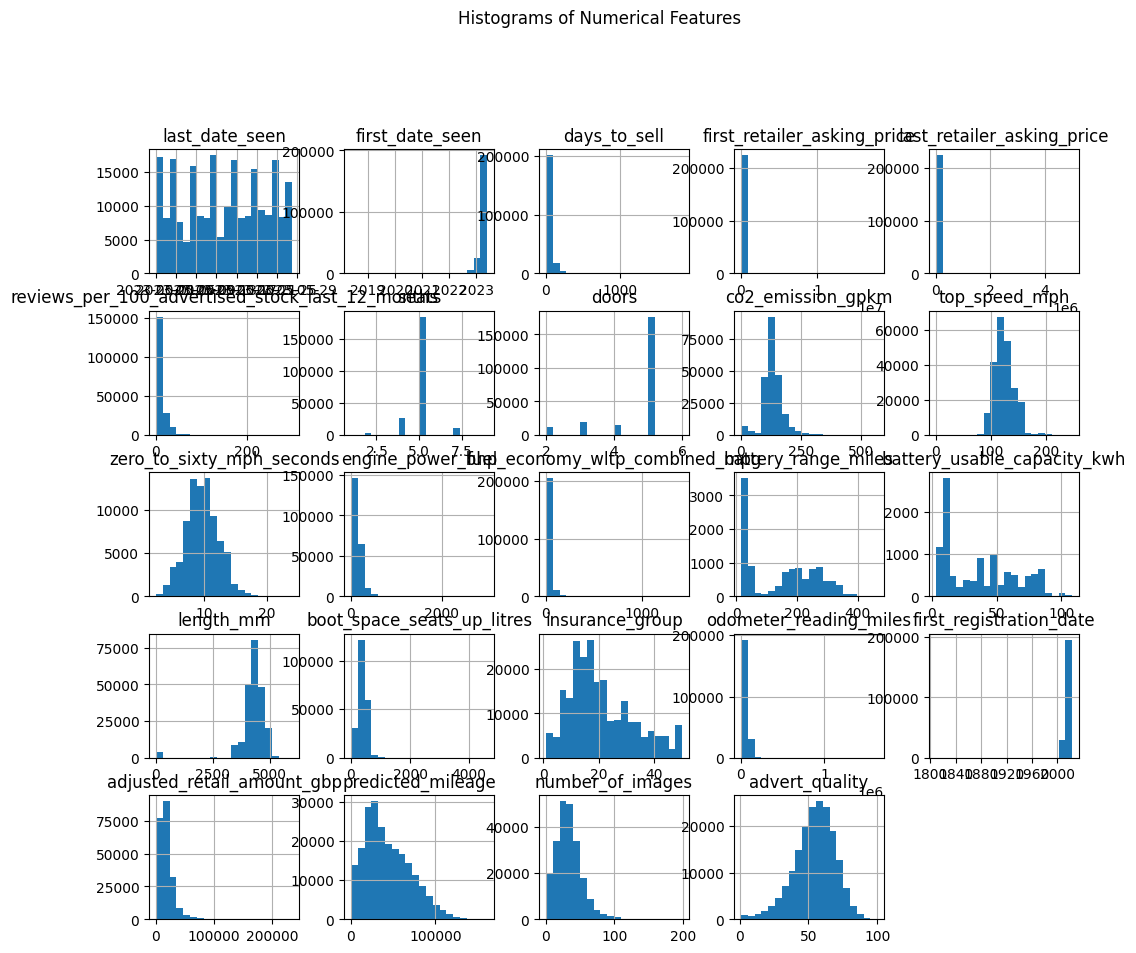

C:\Users\adiln\AppData\Local\Temp\ipykernel_9104\3843239283.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dropped_df.corr()


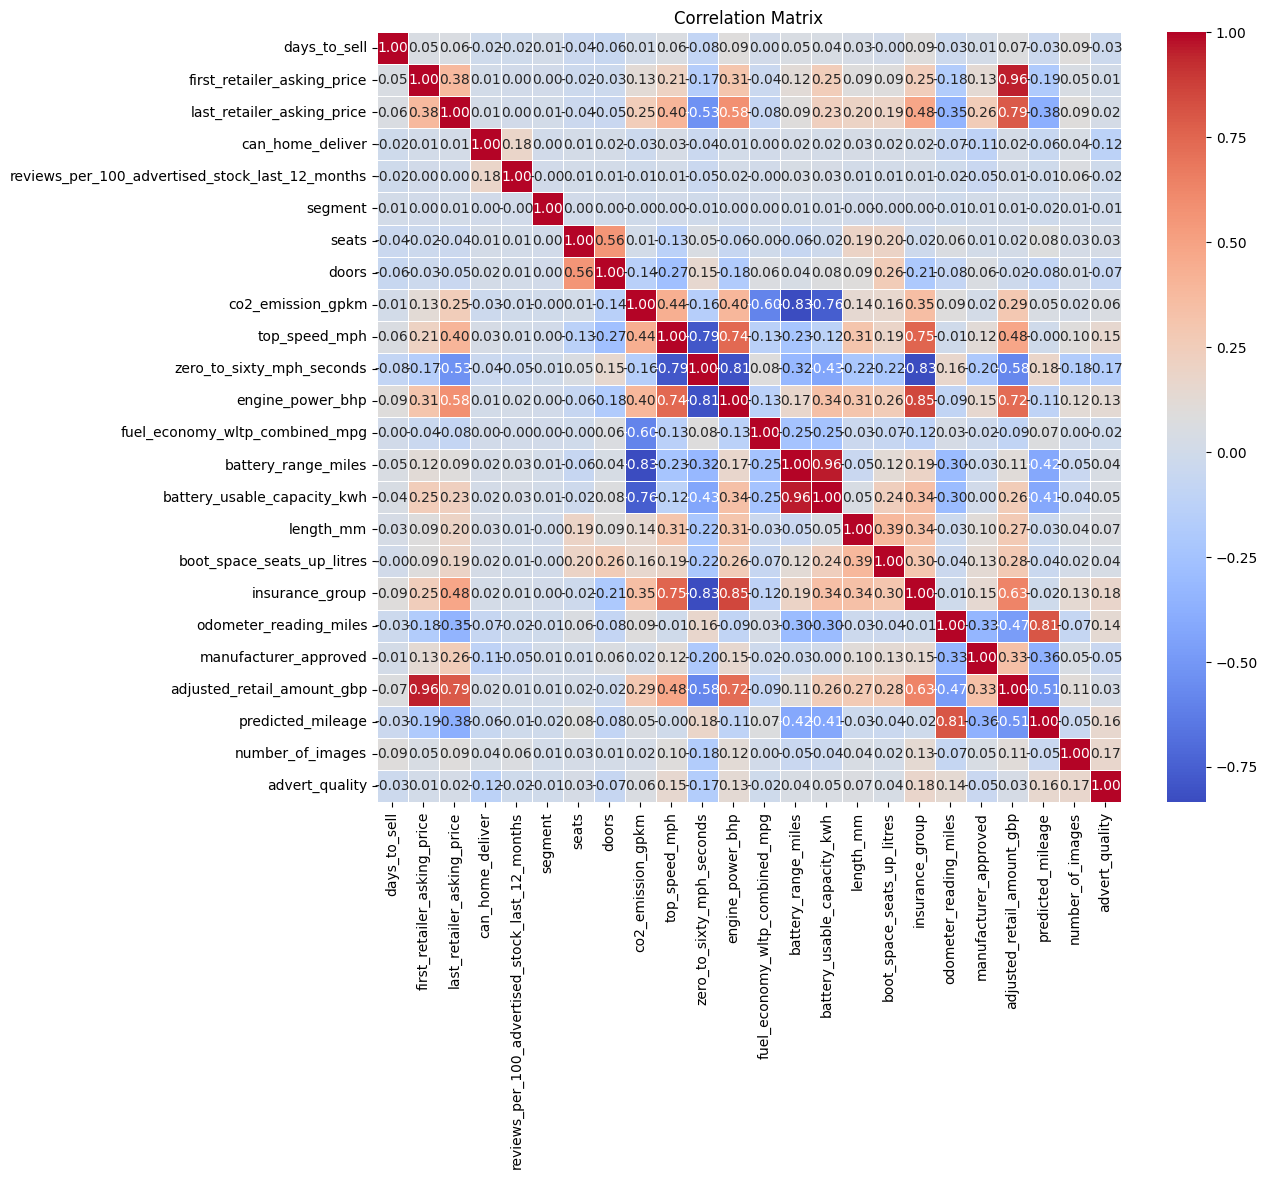

TypeError: boolean value of NA is ambiguous

In [18]:
print(dropped_df.info())

print(dropped_df.describe())

dropped_df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

correlation_matrix = dropped_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(dropped_df, height=2.5)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

categorical_features = dropped_df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=dropped_df, palette='viridis')
    plt.title(f'Count of {feature}')
    plt.show()


In [20]:
import sweetviz as sv

eda_report = sv.analyze(df)
eda_report.show_html('sweetviz_report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [25]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224555 entries, 0 to 224554
Data columns (total 40 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   last_date_seen                                   224555 non-null  datetime64[ns]
 1   first_date_seen                                  224555 non-null  datetime64[ns]
 2   days_to_sell                                     224555 non-null  int32         
 3   first_retailer_asking_price                      224555 non-null  int64         
 4   last_retailer_asking_price                       223626 non-null  float64       
 5   can_home_deliver                                 224555 non-null  bool          
 6   reviews_per_100_advertised_stock_last_12_months  191289 non-null  float64       
 7   segment                                          224555 non-null  bool          
 8   seats                   

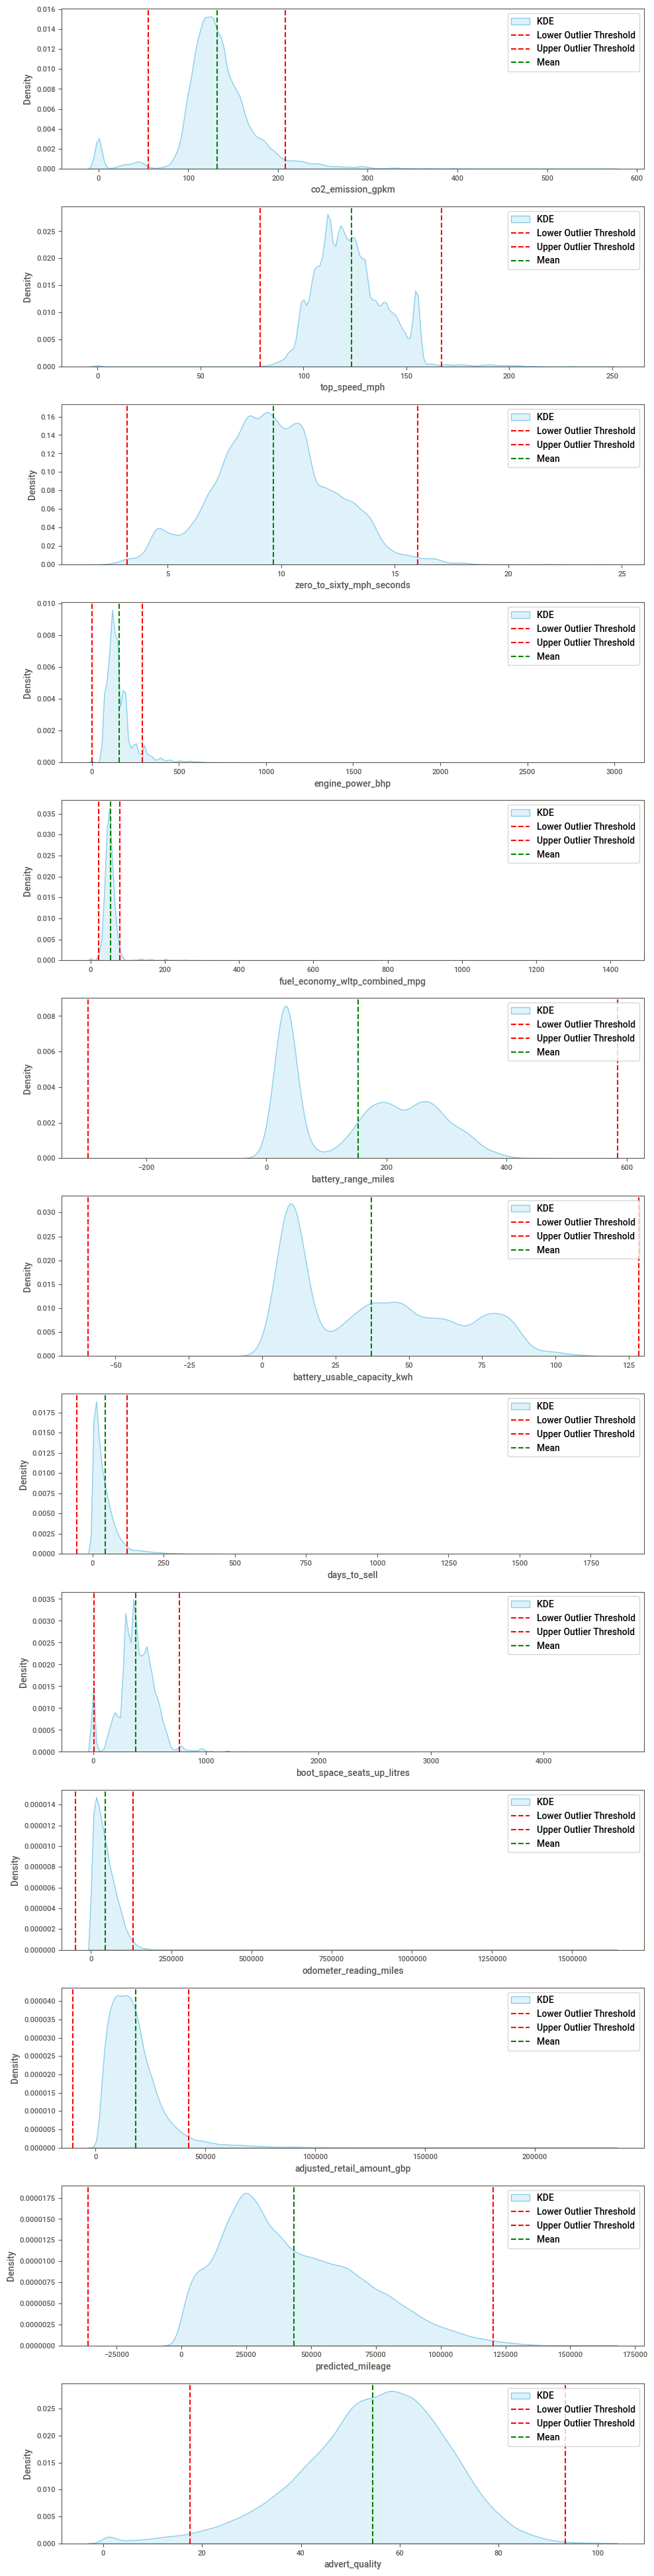

In [33]:
numerical_variables = [
    'co2_emission_gpkm',
    'top_speed_mph',
    'zero_to_sixty_mph_seconds',
    'engine_power_bhp',
    'fuel_economy_wltp_combined_mpg',
    'battery_range_miles',
    'battery_usable_capacity_kwh',
    # 'length_mm',
    'days_to_sell',
    'boot_space_seats_up_litres',
    'odometer_reading_miles',
    'adjusted_retail_amount_gbp',
    'predicted_mileage',
    'advert_quality'
]

fig, axes = plt.subplots(nrows=len(numerical_variables), ncols=1, figsize=(10, 3 * len(numerical_variables)))

for i, variable in enumerate(numerical_variables):
    Q1 = dropped_df[variable].quantile(0.25)
    Q3 = dropped_df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    sns.kdeplot(data=dropped_df, x=variable, ax=axes[i], fill=True, color='skyblue', label='KDE')
    axes[i].axvline(lower_threshold, color='red', linestyle='--', label='Lower Outlier Threshold')
    axes[i].axvline(upper_threshold, color='red', linestyle='--', label='Upper Outlier Threshold')
    axes[i].axvline(dropped_df[variable].mean(), color='green', linestyle='--', label='Mean')

    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()


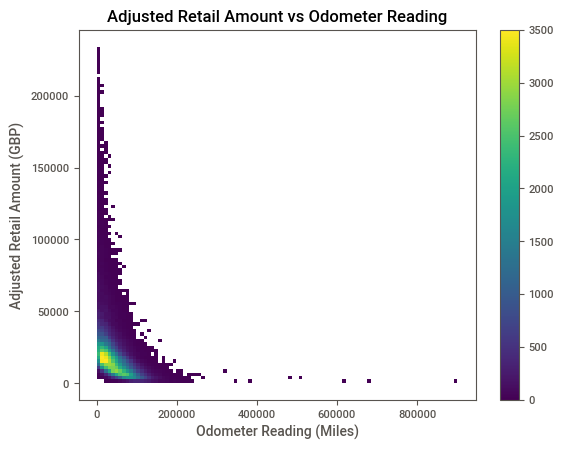

In [38]:

sns.histplot(data=dropped_df, x='odometer_reading_miles', y='adjusted_retail_amount_gbp', bins=100, cmap='viridis', cbar=True)

plt.xlabel('Odometer Reading (Miles)')
plt.ylabel('Adjusted Retail Amount (GBP)')
plt.title('Adjusted Retail Amount vs Odometer Reading')

plt.show()


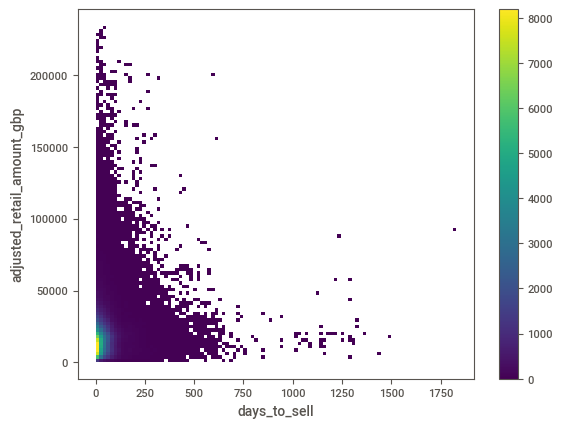

In [37]:
sns.histplot(data=dropped_df, x='days_to_sell', y='adjusted_retail_amount_gbp', bins=100, cmap='viridis', cbar=True)
plt.show()

In [39]:
from scipy.stats import skew, kurtosis

skewness = skew(df['days_to_sell'])
kurt = kurtosis(df['days_to_sell'])

skewness,kurt

(5.282726286490465, 60.28105675244461)